In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [49]:
def getMeanTimeData(problem, mutationType, algorithm, rotation):
    data = np.squeeze(np.asarray(pd.read_csv("Results/"+problem+"/"+mutationType+"/"+algorithm+"/"+rotation+"/t.csv",sep=" ",header=None), dtype=np.int64))
    return (np.mean(data)/1000)/60
def getMeanFitnessData(problem, mutationType, algorithm, rotation):
    data = np.squeeze(np.asarray(pd.read_csv("Results/"+problem+"/"+mutationType+"/"+algorithm+"/"+rotation+"/"+algorithm+".csv",sep=" ",header=None), dtype=np.float32))
    return np.mean(data)


def getProblem1(algorithm, mutation):
    return getMeanFitnessData("P1A2", mutation, algorithm, "SIX")
def getProblem2(algorithm, mutation):
    return getMeanFitnessData("P2A2", mutation, algorithm, "SIX")
def getProblem3(algorithm, mutation):
    return getMeanFitnessData("P3A2", mutation, algorithm, "SIX")
def getProblem4(algorithm, mutation):
    return getMeanFitnessData("P4A2", mutation, algorithm, "SIX")
def getProblem5(algorithm, mutation):
    return getMeanFitnessData("P5A2", mutation, algorithm, "SIX")

def getProblem1Time(algorithm, mutation):
    return getMeanTimeData("P1A2", mutation, algorithm, "SIX")
def getProblem2Time(algorithm, mutation):
    return getMeanTimeData("P2A2", mutation, algorithm, "SIX")
def getProblem3Time(algorithm, mutation):
    return getMeanTimeData("P3A2", mutation, algorithm, "SIX")
def getProblem4Time(algorithm, mutation):
    return getMeanTimeData("P4A2", mutation, algorithm, "SIX")
def getProblem5Time(algorithm, mutation):
    return getMeanTimeData("P5A2", mutation, algorithm, "SIX")

buildProblemData = lambda algorithm,rotation : np.array([getProblem1(algorithm, rotation), getProblem2(algorithm, rotation),getProblem3(algorithm, rotation),getProblem4(algorithm, rotation),getProblem5(algorithm, rotation)])
buildProblemTimeData = lambda algorithm,rotation : np.array([getProblem1Time(algorithm, rotation), getProblem2Time(algorithm, rotation),getProblem3Time(algorithm, rotation),getProblem4Time(algorithm, rotation),getProblem5Time(algorithm, rotation)])


In [105]:
def plotAlgorthmResults(name):
    x = np.array([16, 25, 52, 100, 151])

    algoritms = ['GA', 'ABC','FFA']


    #t1 = buildProblemTimeData(name, "InverseMutation")
    #t2 = buildProblemTimeData(name, "C1Mutation")
    #t3 = buildProblemTimeData(name, "C2Mutation")


    fig,ax = plt.subplot_mosaic([algoritms], figsize=(7*3, 3.5*3))

    for algorithm in algoritms:         
        y1 = buildProblemData(algorithm, "InverseMutation")
        y2 = buildProblemData(algorithm, "C1Mutation")
        y3 = buildProblemData(algorithm, "C2Mutation")
        
        ax[algorithm].set(xlabel='Number of items', ylabel='Fitness')
        ax[algorithm].set_title(algorithm)
        ax[algorithm].scatter(x, y1, label="Inverse Mutation")
        ax[algorithm].scatter(x, y2, label="C1 Mutation")
        ax[algorithm].scatter(x, y3, label="C2 Mutation")
        ax[algorithm].plot(x, y1)
        ax[algorithm].plot(x, y2)
        ax[algorithm].plot(x, y3)
        ax[algorithm].grid()

    ax["GA"].sharey(ax["ABC"])
    ax["FFA"].sharey(ax["ABC"])
    plt.show()



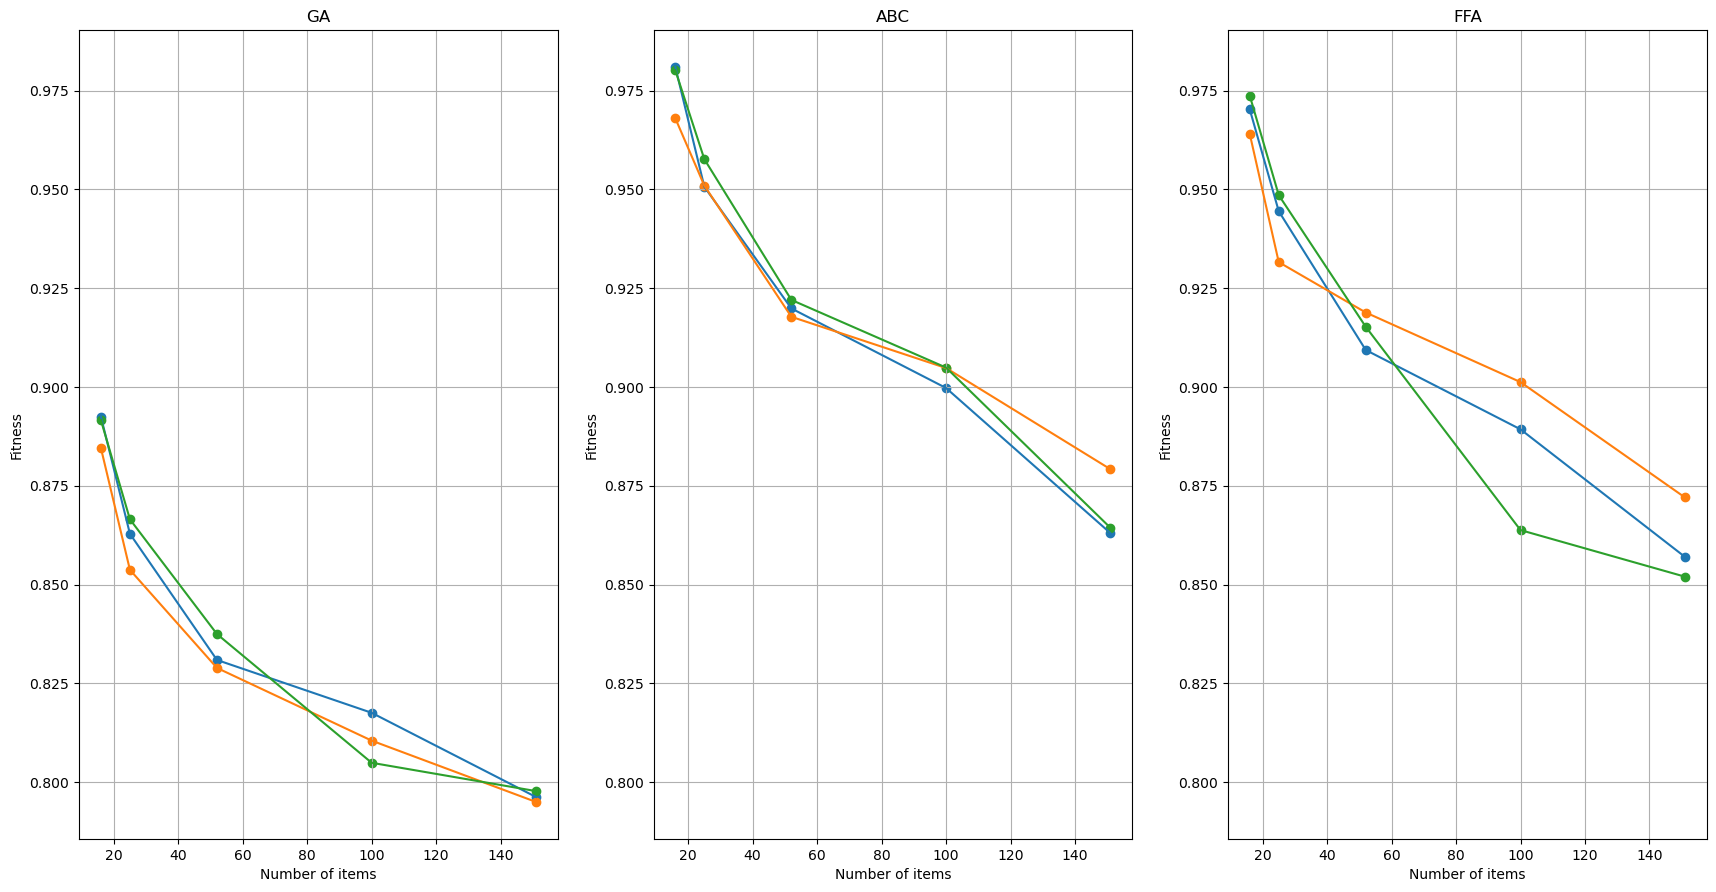

In [106]:
algorithm = "GA"

plotAlgorthmResults(name="GA")

In [ ]:
plotAlgorthmResults(name = "ABC"),plotAlgorthmResults(name = "GA"), plotAlgorthmResults(name = "FFA")